Ahora procedemos a cargar la Data, utilizaré Python

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
%matplotlib inline
from subprocess import check_output

col = ['PATENTE','MARCA', 'MODELO' ,'AÑO','ID_CLIENTE','COMUNA','REGION','SEXO','ACTIVIDAD','TASACION','FEC_TRANSFERENCIA','COLOR2','EDAD','VIGENCIA']
data1= pd.read_csv ('1A.csv', sep=";" , names =col )
data2= pd.read_csv ('1B.csv', sep=";" , names =col )
data3= pd.read_csv ('2.csv', sep=";" , names =col )
data4= pd.read_csv ('3.csv', sep=";" , names =col )
data5= pd.read_csv ('4.csv', sep=";" , names =col )

frames = [data1, data2, data3, data4, data5]
data = pd.concat(frames)
data.drop_duplicates()

print str(data.shape[0])
print data.PATENTE.nunique()

data[:6]

C:\ProgramData\Anaconda2\envs\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (0,1,2,5,6,7,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1104063
689590


,PATENTE,MARCA,MODELO,AÑO,ID_CLIENTE,COMUNA,REGION,SEXO,ACTIVIDAD,TASACION,FEC_TRANSFERENCIA,COLOR2,EDAD,VIGENCIA
0,B83FBCC6-B0C,TOYOTA,RAV 4,2015.0,43357368.0,PEDRO AGUIRRE CERDA,13,F,NaN,11947500.0,NaN,GRIS,41.0,N
1,FE13F5BF-69C,HYUNDAI,SANTA FE GLS 2.4,2010.0,37127053.0,NaN,NaN,NaN,NaN,7018000.0,20161027.0,BLANCO,50.0,S
2,BCACBCD7-BCC,MITSUBISHI,ASX GLX 2.0,2012.0,52580561.0,NaN,NaN,NaN,NaN,6445000.0,20160331.0,PLATEADO,NaN,N
3,318B96D8-05E,SUBARU,ALL NEW OUTBACK 2.5I,2010.0,39937576.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,N
4,A0B22417-C95,SUBARU,ALL,2016.0,53686523.0,PROVIDENCIA,13,F,NaN,NaN,NaN,ROJO,32.0,N
5,4ED85736-F41,CHEVROLET,ORLANDO,2013.0,16972328.0,NaN,NaN,NaN,NaN,7910000.0,20170210.0,ROJO,73.0,S


# Análisis Descriptivo

In [3]:
data.describe()

,AÑO,ID_CLIENTE,ACTIVIDAD,TASACION,FEC_TRANSFERENCIA,EDAD
count,1.006969e+06,1.006969e+06,197779.0,6.090000e+05,3.411520e+05,723490.000000
mean,2.013540e+03,5.650004e+07,0.0,5.826111e+06,2.015180e+07,48.930039
std,2.352165e+00,6.439853e+07,0.0,6.472823e+06,1.681418e+04,12.587792
min,2.010000e+03,0.000000e+00,0.0,0.000000e+00,2.009102e+07,3.000000
25%,2.012000e+03,2.902331e+07,0.0,0.000000e+00,2.014070e+07,39.000000
50%,2.013000e+03,4.062758e+07,0.0,5.955000e+06,2.015120e+07,48.000000
75%,2.015000e+03,5.074204e+07,0.0,1.000000e+07,2.017012e+07,58.000000
max,2.018000e+03,3.298207e+08,0.0,9.188000e+07,2.018011e+07,134.000000


Como vemos todos las variables poseen valores nulos por lo que habrá que ver una descripcción de la data

In [4]:
data.isnull().any()

PATENTE              True
MARCA                True
MODELO               True
AÑO                  True
ID_CLIENTE           True
COMUNA               True
REGION               True
SEXO                 True
ACTIVIDAD            True
TASACION             True
FEC_TRANSFERENCIA    True
COLOR2               True
EDAD                 True
VIGENCIA             True
dtype: bool

En este paso vemos una agrupación de las marcas, colores , comuna y modelos que podrian ser un input de mi futuro modelo para predecir tenencia o recambio

In [18]:
highest_MARCA = data.groupby('MARCA').PATENTE.count().sort_values(ascending=False).head()
highest_MARCA

MARCA
HYUNDAI       106758
NISSAN         83746
KIA MOTORS     76742
CHEVROLET      76139
TOYOTA         76086
Name: PATENTE, dtype: int64

In [15]:
highest_COLOR = data.groupby('COLOR2').PATENTE.count().sort_values(ascending=False).head()
highest_COLOR

COLOR2
GRIS        231524
BLANCO      213744
PLATEADO    205961
NEGRO       123425
ROJO         63273
Name: PATENTE, dtype: int64

In [19]:
highest_COMUNA = data.groupby('COMUNA').PATENTE.count().sort_values(ascending=False).head()
highest_COMUNA

COMUNA
LAS CONDES     45799
               33432
SANTIAGO       22283
PROVIDENCIA    20560
MAIPU          18269
Name: PATENTE, dtype: int64

In [13]:
highest_MODELO = data.groupby('MODELO').PATENTE.count().sort_values(ascending=False).head()
highest_MODELO

MODELO
RAV 4                18619
QASHQAI              17309
NEW TUCSON GL 2.0    13662
TUCSON               12610
SPORTAGE             11480
Name: PATENTE, dtype: int64

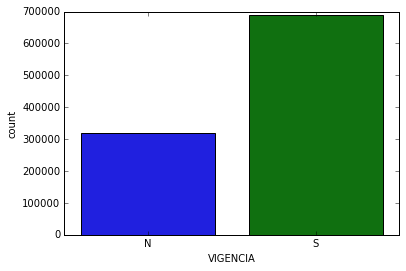

In [20]:
#visualize dataset
sns.countplot(data['VIGENCIA'])

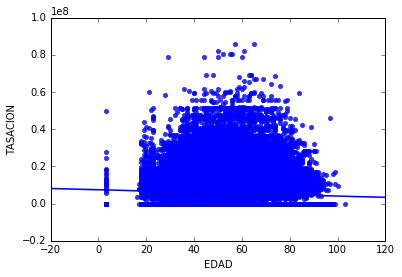

In [17]:
sns.regplot(x='EDAD',y='TASACION',data=data)

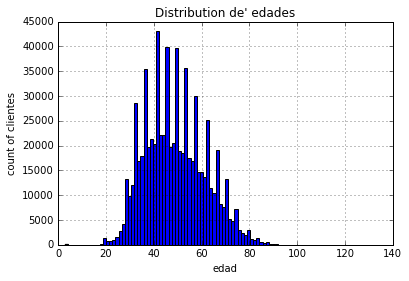

              TASACION              
                  size          mean
MARCA                               
ACURA             14.0  3.126075e+06
AUDI            4839.0  1.092245e+07
AUTORRAD          11.0  1.080000e+06
BAIC            1941.0  6.447097e+06
BAIC YINXIANG      2.0           NaN


In [20]:
data.EDAD.hist(bins=100)
plt.title("Distribution de' edades")
plt.ylabel('count of clientes')
plt.xlabel('edad')
plt.show()

labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data['EDAD_group'] = pd.cut(data.EDAD, range(0, 81, 10), right=False, labels=labels)
#print data[['MARCA','EDAD', 'EDAD_group']].drop_duplicates()[:10].head()

print data.groupby('MARCA').agg({'TASACION': [np.size, np.mean]}).head()


# TRATAMIENTO DE DATOS

In [2]:
data['VIGENCIA'] = data['VIGENCIA'].map({'S': 1, 'N': 0})
data['SEXO'] = data['SEXO'].map({'M': 1, 'F': 0})
data

,PATENTE,MARCA,MODELO,AÑO,ID_CLIENTE,COMUNA,REGION,SEXO,ACTIVIDAD,TASACION,FEC_TRANSFERENCIA,COLOR2,EDAD,VIGENCIA
0,B83FBCC6-B0C,TOYOTA,RAV 4,2015.0,43357368.0,PEDRO AGUIRRE CERDA,13,0.0,NaN,11947500.0,NaN,GRIS,41.0,0.0
1,FE13F5BF-69C,HYUNDAI,SANTA FE GLS 2.4,2010.0,37127053.0,NaN,NaN,NaN,NaN,7018000.0,20161027.0,BLANCO,50.0,1.0
2,BCACBCD7-BCC,MITSUBISHI,ASX GLX 2.0,2012.0,52580561.0,NaN,NaN,NaN,NaN,6445000.0,20160331.0,PLATEADO,NaN,0.0
3,318B96D8-05E,SUBARU,ALL NEW OUTBACK 2.5I,2010.0,39937576.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,0.0
4,A0B22417-C95,SUBARU,ALL,2016.0,53686523.0,PROVIDENCIA,13,0.0,NaN,NaN,NaN,ROJO,32.0,0.0
5,4ED85736-F41,CHEVROLET,ORLANDO,2013.0,16972328.0,NaN,NaN,NaN,NaN,7910000.0,20170210.0,ROJO,73.0,1.0
6,07DFF1D8-4D5,LAND ROVER,FREELANDER 2 2.2,2013.0,251981325.0,LA SERENA,4,NaN,NaN,0.0,NaN,VERDE,NaN,0.0
7,E4E8A944-4A4,ZOTYE,HUNTER T200 FULL 1.5,2014.0,18551614.0,NaN,NaN,NaN,NaN,NaN,20160311.0,BLANCO,66.0,1.0
8,270C76BC-8C1,SUBARU,XV 2.0R AWD LIMITED AUT,2011.0,252262083.0,NaN,NaN,NaN,NaN,NaN,20161221.0,GRIS,NaN,0.0
9,B6D0D421-E82,NISSAN,QASHQAI,2013.0,47687576.0,NaN,NaN,NaN,NaN,8575000.0,20170223.0,GRIS,37.0,1.0


In [5]:
data.dropna(axis=0, subset=['VIGENCIA']) 

,PATENTE,MARCA,MODELO,AÑO,ID_CLIENTE,COMUNA,REGION,SEXO,ACTIVIDAD,TASACION,FEC_TRANSFERENCIA,COLOR2,EDAD,VIGENCIA
0,B83FBCC6-B0C,TOYOTA,RAV 4,2015.0,43357368.0,PEDRO AGUIRRE CERDA,13,F,NaN,11947500.0,NaN,GRIS,41.0,N
1,FE13F5BF-69C,HYUNDAI,SANTA FE GLS 2.4,2010.0,37127053.0,NaN,NaN,NaN,NaN,7018000.0,20161027.0,BLANCO,50.0,S
2,BCACBCD7-BCC,MITSUBISHI,ASX GLX 2.0,2012.0,52580561.0,NaN,NaN,NaN,NaN,6445000.0,20160331.0,PLATEADO,NaN,N
3,318B96D8-05E,SUBARU,ALL NEW OUTBACK 2.5I,2010.0,39937576.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,N
4,A0B22417-C95,SUBARU,ALL,2016.0,53686523.0,PROVIDENCIA,13,F,NaN,NaN,NaN,ROJO,32.0,N
5,4ED85736-F41,CHEVROLET,ORLANDO,2013.0,16972328.0,NaN,NaN,NaN,NaN,7910000.0,20170210.0,ROJO,73.0,S
6,07DFF1D8-4D5,LAND ROVER,FREELANDER 2 2.2,2013.0,251981325.0,LA SERENA,4,NaN,NaN,0.0,NaN,VERDE,NaN,N
7,E4E8A944-4A4,ZOTYE,HUNTER T200 FULL 1.5,2014.0,18551614.0,NaN,NaN,NaN,NaN,NaN,20160311.0,BLANCO,66.0,S
8,270C76BC-8C1,SUBARU,XV 2.0R AWD LIMITED AUT,2011.0,252262083.0,NaN,NaN,NaN,NaN,NaN,20161221.0,GRIS,NaN,N
9,B6D0D421-E82,NISSAN,QASHQAI,2013.0,47687576.0,NaN,NaN,NaN,NaN,8575000.0,20170223.0,GRIS,37.0,S


In [14]:
#Impute numerical missing values with mean
#data['TASACION'] = data['TASACION'].fillna(data['TASACION'].mean(),inplace=True)
data['TASACION']  = data['TASACION'] .fillna(value = -999)

In [15]:
data

,PATENTE,MARCA,MODELO,AÑO,ID_CLIENTE,COMUNA,REGION,SEXO,ACTIVIDAD,TASACION,FEC_TRANSFERENCIA,COLOR2,EDAD,VIGENCIA
0,B83FBCC6-B0C,TOYOTA,RAV 4,2015.0,43357368.0,PEDRO AGUIRRE CERDA,13,F,NaN,11947500.0,NaN,GRIS,41.0,N
1,FE13F5BF-69C,HYUNDAI,SANTA FE GLS 2.4,2010.0,37127053.0,NaN,NaN,NaN,NaN,7018000.0,20161027.0,BLANCO,50.0,S
2,BCACBCD7-BCC,MITSUBISHI,ASX GLX 2.0,2012.0,52580561.0,NaN,NaN,NaN,NaN,6445000.0,20160331.0,PLATEADO,NaN,N
3,318B96D8-05E,SUBARU,ALL NEW OUTBACK 2.5I,2010.0,39937576.0,NaN,NaN,NaN,NaN,-9999.0,NaN,NaN,39.0,N
4,A0B22417-C95,SUBARU,ALL,2016.0,53686523.0,PROVIDENCIA,13,F,NaN,-9999.0,NaN,ROJO,32.0,N
5,4ED85736-F41,CHEVROLET,ORLANDO,2013.0,16972328.0,NaN,NaN,NaN,NaN,7910000.0,20170210.0,ROJO,73.0,S
6,07DFF1D8-4D5,LAND ROVER,FREELANDER 2 2.2,2013.0,251981325.0,LA SERENA,4,NaN,NaN,0.0,NaN,VERDE,NaN,N
7,E4E8A944-4A4,ZOTYE,HUNTER T200 FULL 1.5,2014.0,18551614.0,NaN,NaN,NaN,NaN,-9999.0,20160311.0,BLANCO,66.0,S
8,270C76BC-8C1,SUBARU,XV 2.0R AWD LIMITED AUT,2011.0,252262083.0,NaN,NaN,NaN,NaN,-9999.0,20161221.0,GRIS,NaN,N
9,B6D0D421-E82,NISSAN,QASHQAI,2013.0,47687576.0,NaN,NaN,NaN,NaN,8575000.0,20170223.0,GRIS,37.0,S


In [32]:
# FUNCIONES
# ---------------------------------------------------------------------
def create_num_vector(df, variable):
 num_vector = df[variable]
 if num_vector.dtype == 'O':
  num_vector = num_vector.str.replace(",", ".")
  num_vector = num_vector.str.replace(" ", "")
 return pd.to_numeric(num_vector)

def get_quantile(num_vector, umbrales):
 q_vect = []
 for i in umbrales:
  q_vect = q_vect + [round(num_vector.quantile(i),4)]
 q_vect = list(set(q_vect))
 q_vect.sort() 
 return q_vect

def print_ranges(cuantiles, variable, output_type):
 comment_chr = {'sql_query':'-- ','qlik_query':'// ','pandas_query':'# ','r_query':'# '}
 print comment_chr[output_type], output_type.upper(), variable.upper()

 for i, val  in enumerate(cuantiles):

  if i == 0:
   if output_type == 'sql_query':
    print 'case when '+variable+' < '+str(cuantiles[i+1])+' then 1 else 0 end as '+variable+'_q'+str(i)+','
   elif output_type == 'qlik_query':
    print 'if('+variable+ ' < '+str(cuantiles[i+1])+', 1, 0) as '+variable+'_q'+str(i)+','

  elif val == cuantiles[-2]:
   if output_type == 'sql_query':
    print 'case when '+variable+' >= '+str(val)+' then 1 else 0 end as '+variable+'_q'+str(i)+','
   elif output_type == 'qlik_query':
    print 'if('+variable+' >= '+str(val)+', 1, 0) as '+variable+'_q'+str(i)+','
   break

  else:
   if output_type == 'sql_query':
    print 'case when '+variable+' >= '+str(val)+' and '+variable+' < '+str(cuantiles[i+1])+' then 1 else 0 end as '+variable+'_q'+str(i)+','
   elif output_type =='qlik_query':
    print 'if('+variable+ ' >= '+str(val)+' and '+variable+' < '+str(cuantiles[i+1])+', 1, 0) as '+variable+'_q'+str(i)+','


In [35]:
# Ejecucion
#df = pd.read_csv('https://www.dropbox.com/s/ed4j8l550zdy78j/churn3.csv?dl=1')
#variable = 'total_day_calls'
umbrales =   np.linspace(0, 1, 11)
cuantiles = get_quantile(create_num_vector(data, 'TASACION'), umbrales)
cuantiles2 = get_quantile(create_num_vector(data, 'EDAD'), umbrales)
print_ranges(cuantiles, 'TASACION', 'qlik_query')
print_ranges(cuantiles2, 'EDAD', 'qlik_query')

//  QLIK_QUERY TASACION
if(TASACION < 5955000.0, 1, 0) as TASACION_q0,
if(TASACION >= 5955000.0 and TASACION < 7489000.0, 1, 0) as TASACION_q1,
if(TASACION >= 7489000.0 and TASACION < 9100000.0, 1, 0) as TASACION_q2,
if(TASACION >= 9100000.0 and TASACION < 10665000.0, 1, 0) as TASACION_q3,
if(TASACION >= 10665000.0 and TASACION < 13186666.0, 1, 0) as TASACION_q4,
if(TASACION >= 13186666.0, 1, 0) as TASACION_q5,
//  QLIK_QUERY EDAD
if(EDAD < 33.0, 1, 0) as EDAD_q0,
if(EDAD >= 33.0 and EDAD < 37.0, 1, 0) as EDAD_q1,
if(EDAD >= 37.0 and EDAD < 41.0, 1, 0) as EDAD_q2,
if(EDAD >= 41.0 and EDAD < 44.0, 1, 0) as EDAD_q3,
if(EDAD >= 44.0 and EDAD < 48.0, 1, 0) as EDAD_q4,
if(EDAD >= 48.0 and EDAD < 52.0, 1, 0) as EDAD_q5,
if(EDAD >= 52.0 and EDAD < 56.0, 1, 0) as EDAD_q6,
if(EDAD >= 56.0 and EDAD < 60.0, 1, 0) as EDAD_q7,
if(EDAD >= 60.0 and EDAD < 66.0, 1, 0) as EDAD_q8,
if(EDAD >= 66.0, 1, 0) as EDAD_q9,


Tramificación simple de variables

In [51]:
def score_to_numeric(x):
    if x < 0.0:
        return 0
    if x >= 0.0 and x < 4400000.0:
        return 1
    if x >= 4400000.0 and x < 8016000.0:
        return 2
    if x >= 8016000.0 and x < 11020000.0:
        return 3
    if x >= 11020000.0:
        return 4
    
def score_to_numeric2(x):
        if x < 33.0:
            return 0
        if x >= 33.0 and x < 37.0:
            return 1
        if x >= 37.0 and x < 41.0:
            return 2
        if x >= 41.0 and x < 44.0:
            return 3
        if x >= 44.0 and x < 48.0:
            return 4
        if x >= 48.0:
            return 5
    
    
def score_to_numeric3(x):
    if x=='HYUNDAI':
        return 4
    if x=='NISSAN':
        return 3
    if x=='KIA MOTORS':
        return 2
    if x=='CHEVROLET':
        return 1
    if x=='TOYOTA':
        return 0
    else:
        return 5
    
    
def score_to_numeric4(x):
    if x=='GRIS ':
        return 4
    if x=='BLANCO':
        return 3
    if x=='PLATEADO':
        return 2
    if x=='NEGRO ':
        return 1
    if x=='ROJO':
        return 0
    else:
        return 5    
    
def score_to_numeric5(x):
    if x=='LAS CONDES':
        return 4
    if x=='SANTIAGO':
        return 3
    if x=='PROVIDENCIA':
        return 2
    if x=='MAIPU ':
        return 1
    else:
        return 5    


In [52]:
  data['TASACION2'] = data['TASACION'].apply(score_to_numeric)
  data['EDAD2'] = data['EDAD'].apply(score_to_numeric2)
  data['MARCA2'] = data['MARCA'].apply(score_to_numeric3)
  data['COLOR'] = data['COLOR2'].apply(score_to_numeric4)
  data['COMUNA2'] = data['COMUNA'].apply(score_to_numeric5)

In [53]:
data

,PATENTE,MARCA,MODELO,AÑO,ID_CLIENTE,COMUNA,REGION,SEXO,ACTIVIDAD,TASACION,...,COLOR2,EDAD,VIGENCIA,EDAD_group,papa,TASACION2,EDAD2,MARCA2,COLOR,COMUNA2
0,B83FBCC6-B0C,TOYOTA,RAV 4,2015.0,43357368.0,PEDRO AGUIRRE CERDA,13,0.0,NaN,11947500.0,...,GRIS,41.0,0.0,40-49,4.0,4.0,3.0,0,5,5
1,FE13F5BF-69C,HYUNDAI,SANTA FE GLS 2.4,2010.0,37127053.0,NaN,NaN,NaN,NaN,7018000.0,...,BLANCO,50.0,1.0,50-59,2.0,2.0,5.0,4,3,5
2,BCACBCD7-BCC,MITSUBISHI,ASX GLX 2.0,2012.0,52580561.0,NaN,NaN,NaN,NaN,6445000.0,...,PLATEADO,NaN,0.0,NaN,2.0,2.0,NaN,5,2,5
3,318B96D8-05E,SUBARU,ALL NEW OUTBACK 2.5I,2010.0,39937576.0,NaN,NaN,NaN,NaN,NaN,...,NaN,39.0,0.0,30-39,NaN,NaN,2.0,5,5,5
4,A0B22417-C95,SUBARU,ALL,2016.0,53686523.0,PROVIDENCIA,13,0.0,NaN,NaN,...,ROJO,32.0,0.0,30-39,NaN,NaN,0.0,5,0,2
5,4ED85736-F41,CHEVROLET,ORLANDO,2013.0,16972328.0,NaN,NaN,NaN,NaN,7910000.0,...,ROJO,73.0,1.0,70-79,2.0,2.0,5.0,1,0,5
6,07DFF1D8-4D5,LAND ROVER,FREELANDER 2 2.2,2013.0,251981325.0,LA SERENA,4,NaN,NaN,0.0,...,VERDE,NaN,0.0,NaN,1.0,1.0,NaN,5,5,5
7,E4E8A944-4A4,ZOTYE,HUNTER T200 FULL 1.5,2014.0,18551614.0,NaN,NaN,NaN,NaN,NaN,...,BLANCO,66.0,1.0,60-69,NaN,NaN,5.0,5,3,5
8,270C76BC-8C1,SUBARU,XV 2.0R AWD LIMITED AUT,2011.0,252262083.0,NaN,NaN,NaN,NaN,NaN,...,GRIS,NaN,0.0,NaN,NaN,NaN,NaN,5,5,5
9,B6D0D421-E82,NISSAN,QASHQAI,2013.0,47687576.0,NaN,NaN,NaN,NaN,8575000.0,...,GRIS,37.0,1.0,30-39,3.0,3.0,2.0,3,5,5


In [54]:
df = data[['VIGENCIA', 'SEXO', 'TASACION2', 'EDAD2', 'MARCA2', 'COLOR', 'COMUNA2']]

In [55]:
df = df.dropna()

In [56]:
X = df.drop('VIGENCIA', axis=1)
y = df['VIGENCIA']

# MODELOS

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [58]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [59]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [60]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

# PERFORMANCE

In [61]:
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.75917834647903304

 accuracy score  ~75.91%, es mejor que un  50/50.

Vemos nuestra confusion matrix:

In [63]:
from sklearn.metrics import confusion_matrix
import collections
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicción No Supervivencia', 'Predicción Supervivencia'],
    index=['Falsos Positivos', 'Verdaderos Positivos']
)

,Predicción No Supervivencia,Predicción Supervivencia
Falsos Positivos,82,3956
Verdaderos Positivos,288,13297


In [84]:
import collections
dot_data = tree.export_graphviz(model.tree_, out_file=None, feature_names=X.columns)

In [87]:
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

#graph.write_png('tree.png')

Como vemos podemos concluir que nuestro target Respecto a Vigencia y recambio de automoviles, depende de un conjunto de variables, que corresponden a descripciones del vehiculo y acaracteristicas propias del cliente como edad, comuna donde reside y preferencias del vehiculo, entre otras esto se podría extrapolar más, pero creo que que un arbol de decisión con poda a través de predictibilidad como lo es el Kpi de Gini es un buen indicio en esta prueba